In [26]:
import pandas as pd

df = pd.read_csv("diabetes.csv", sep=";")
df.replace('.',',')
df.info()
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
X = X.astype(float)
X.info()
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose              

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

n_estimators = 2
max_features = 0.5

model = RandomForestClassifier(n_estimators=n_estimators,
                               max_features=max_features)

model.fit(X, y)
pred = model.predict(X)
acc_rf = round(accuracy_score(y, pred), 3)
print(f"{acc_rf}")
prec_rf = round(precision_score(y, pred), 3)
print(f"{prec_rf}")
f1_rf = round(f1_score(y, pred), 3)
print(f"{f1_rf}")

Accuracy for Random Forest Classifier: 0.867
Precision for Random Forest Classifier: 0.961
F1 Score for Random Forest Classifier: 0.772


In [28]:
t = [1]
f = [0]
n = []
b = [0, 1]

In [29]:
import pandas as pd

df = pd.DataFrame(index=X.index)
df['label_old'] = [n for x in X.index]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label_old  768 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [30]:
X_bt = X.sample(frac=max_features)
X_bt = X_bt.sample(frac=max_features, axis='columns')
y_bt = y.loc[X_bt.index]
X_bt.shape

(384, 4)

In [31]:
from sklearn.tree import DecisionTreeClassifier

# без ограничения глубины дерево не рисуется
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_bt, y_bt)
pred = model.predict(X_bt)
accuracy_score(y_bt, pred)

0.8385416666666666

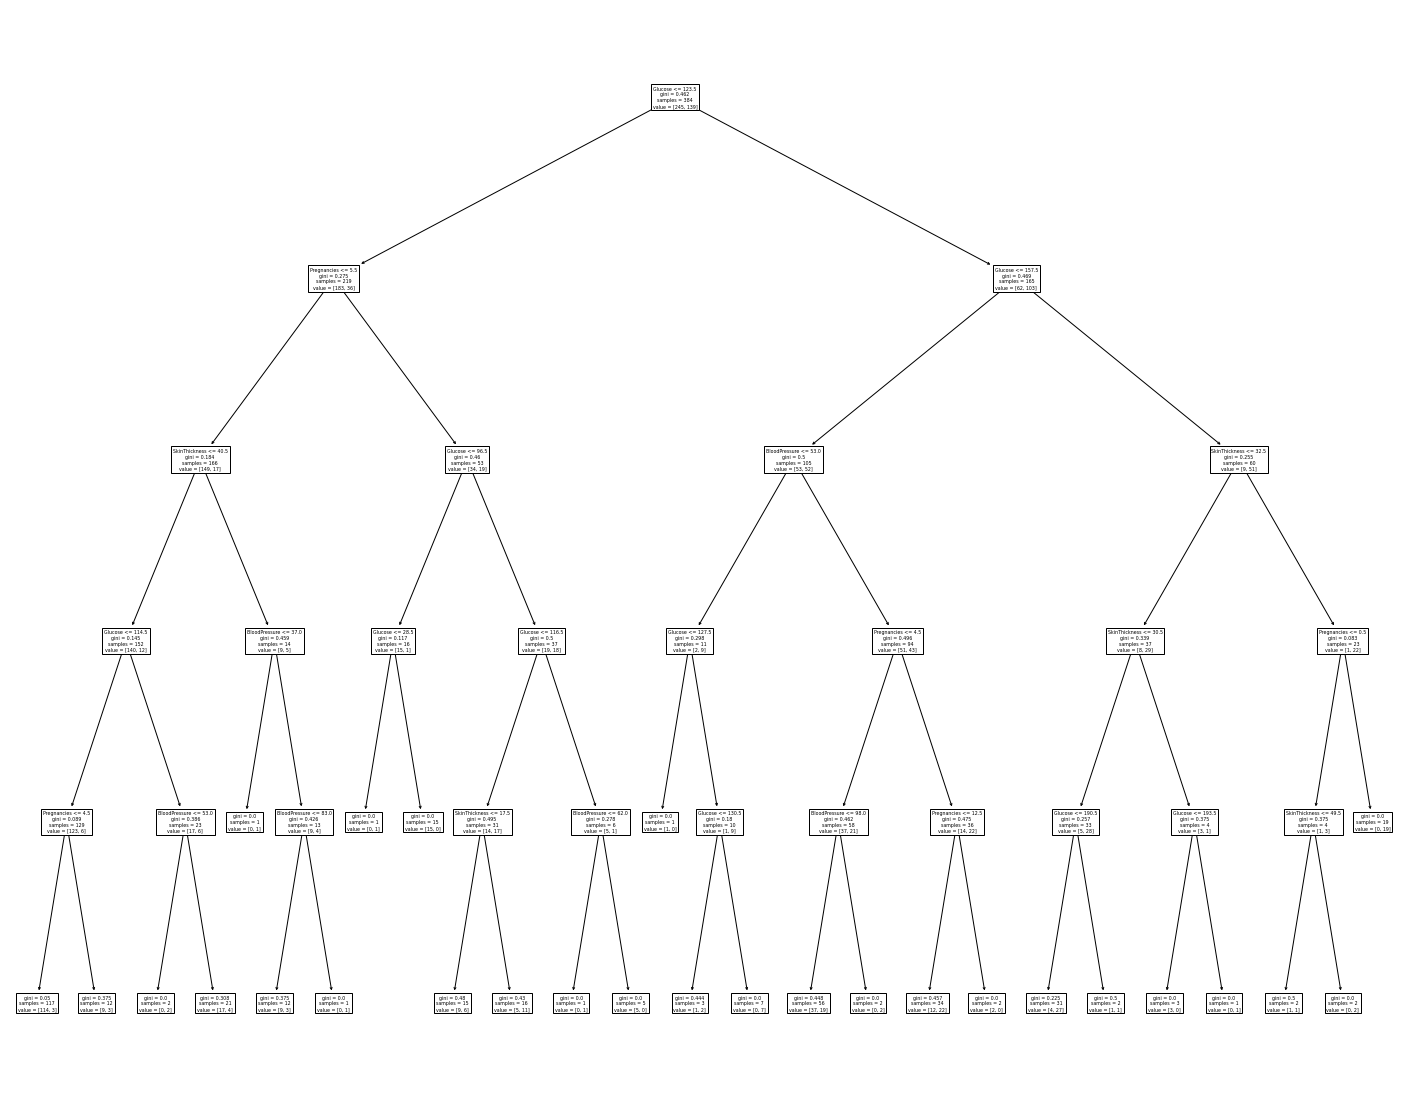

In [32]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model,
               feature_names = X_bt.columns)
fig.show()

In [33]:
index_df = pd.DataFrame(index=X.index)
pred_df = pd.DataFrame(pred, index=X_bt.index, columns=['label_new'])
pred_df = pd.concat([index_df, pred_df], axis=1)
pred_df.head()
# NaN - строки не попали в выборки

,label_new
0,1.0
1,NaN
2,1.0
3,0.0
4,NaN


In [34]:
pred_df['label_new'] = pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
pred_df.head()
# множества из многозначной логики

,label_new
0,[1]
1,[]
2,[1]
3,[0]
4,[]


In [35]:
df = pd.concat([df, pred_df], axis=1)
df.head()

,label_old,label_new
0,[],[1]
1,[],[]
2,[],[1]
3,[],[0]
4,[],[]


In [36]:
df['label_old'] = df[['label_old', 'label_new']].values.tolist()
df = df.drop(columns=['label_new'])
df.to_csv('labels.csv')
df.head()

,label_old
0,"[[], [1]]"
1,"[[], []]"
2,"[[], [1]]"
3,"[[], [0]]"
4,"[[], []]"


In [38]:
def disj(labels):
  a = labels[0]
  b = labels[1]

  if a == b:
    return a
  elif a == t or b == t:
    return t
  elif a == f:
    return b
  elif b == f:
    return a
  else:
    return t

df['label_old'] = df['label_old'].apply(disj)
df.to_csv('labels.csv')
df.head()

,label_old
0,[1]
1,[]
2,[1]
3,[]
4,[]


In [39]:
iter = 0

pred = [x[0] if len(x) == 1 else -1 for x in df['label_old'].values]
print(f"{round(accuracy_score(y, pred), 3)}")

Iter. #0 Accuracy: 0.129


In [40]:
from sklearn.metrics import precision_score

pred = [x if x == 1 else 0 for x in pred]
print(f"{round(precision_score(y, pred), 3)}")

Iter. #0 Precision: 0.818


In [ ]:
pred = [x if x == 1 else 0 for x in pred]
print(f"{round(f1_score(y, pred), 3)}")